In [1]:
from astropy.wcs import WCS
from pygsm import GlobalSkyModel # The 2016 model sucks SO much
import healpy as hp
from pixell import enmap, utils
from pixell import reproject
from pixell import enplot
from pyuvdata import UVData
from astropy.io import fits
import matplotlib.pyplot as plt
from astropy.wcs import wcs
import numpy as np

In [2]:
# Convenient wrapper for displaying enmaps
def eshow(x,**kwargs): enplot.show(enplot.plot(x,**kwargs)) 

def GSM_from_fits(fitsfile,outfile,showplot=True):
    """This function will take a fitsfile, and create a GSM model of same area

    Arguments: 
    fitsfile: Path to fits file with shape (nx,ny)
    outfile: Name of output GSM fits file

    Returns:
    GSM model over area of input fitsimage
    """

    #read in input fits image 
    image = enmap.read_map(fitsfile)
    
    #read GSM model
    gsm_hp = hp.read_map('/lustre/aoc/projects/hera/gtucker/repositories/plimpy/PolarizedImaging/GSM150MHz.fits') #already been made

    #Project a healpix map to an enmap of chosen shape and wcs
    gsm = reproject.enmap_from_healpix_interp(gsm_hp, image[0][0].shape, image[0][0].wcs)

    #show plots
    if showplot == True:
        eshow(gsm/3., min=-45, max = 150) #sky model
        eshow(fitsfile) #input fitsfile
    else:
        pass
    
    #
    enmap.write_fits(outfile+'.fits',gsm)
    return 'Done!'

Convert uvh5 file to fits file by created a uvfits object, turning it into a casa image, and then write out as a fitsfile

Set OBSGEO-B to   -30.721389 from OBSGEO-[XYZ].
Set OBSGEO-H to     1496.994 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
/lustre/aoc/projects/hera/gtucker/anaconda3/envs/hera/lib/python3.6/site-packages/healpy-1.13.0-py3.6-linux-x86_64.egg/healpy/fitsfunc.py:352: UserWarning: If you are not specifying the input dtype and using the default np.float64 dtype of read_map(), please consider that it will change in a future version to None as to keep the same dtype of the input file: please explicitly set the dtype if it is important to you.
  "If you are not specifying the input dtype and using the default "


NSIDE = 512
ORDERING = RING in fits file
INDXSCHM = IMPLICIT


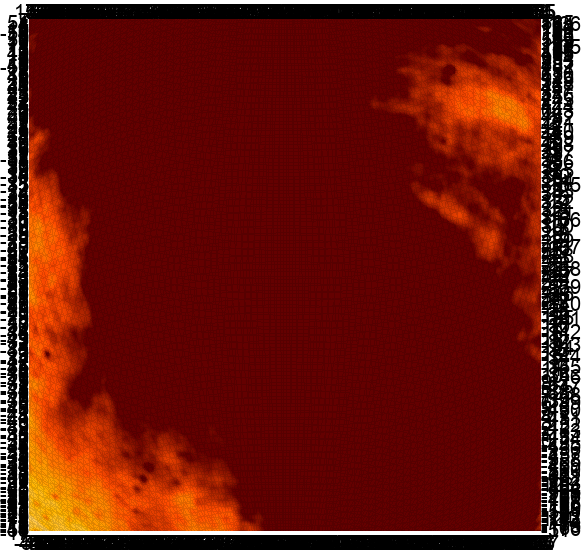

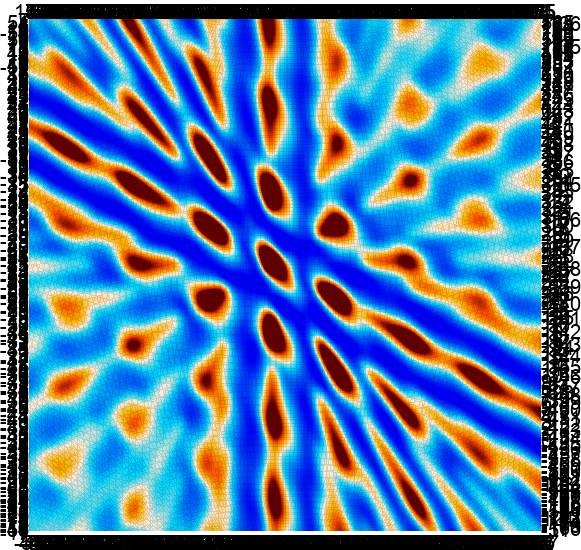

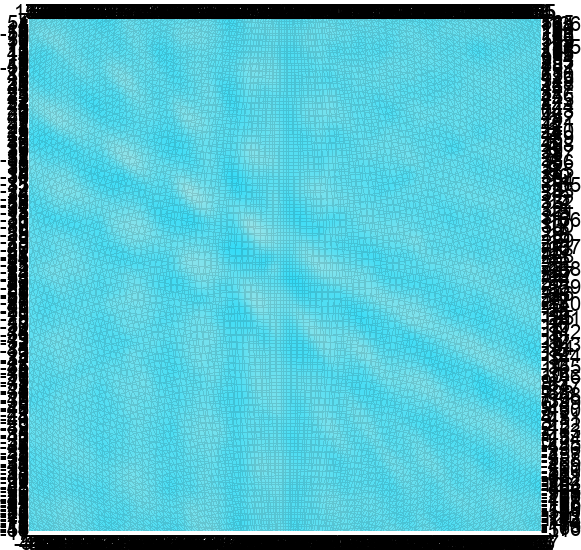

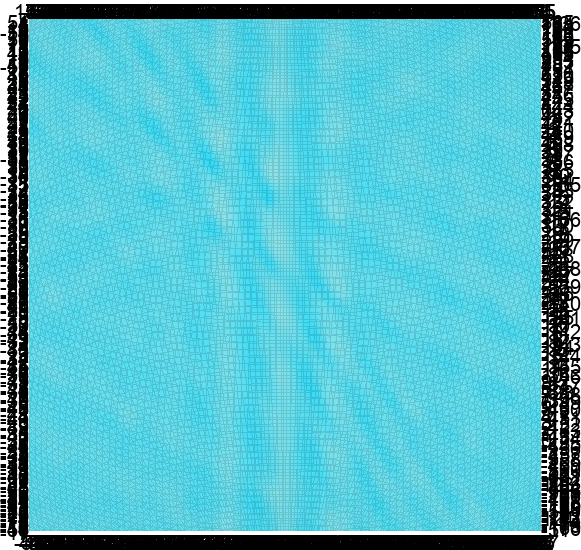

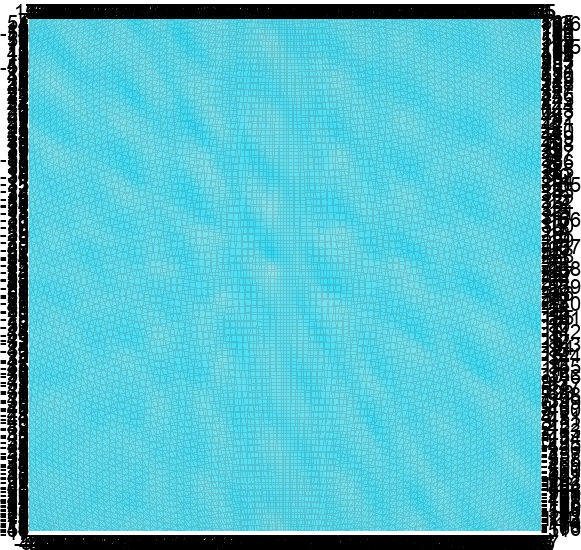

'Done!'

In [3]:
#use fitsfile to seletct region of the global sky model we're interested in
fitsfile= '/lustre/aoc/projects/hera/jaguirre/HERA19Summer2020/CalibratedData/2457548/zen.2457548.45923.uvcRP.calibrated.image.fits'
GSM_from_fits('/lustre/aoc/projects/hera/jaguirre/HERA19Summer2020/CalibratedData/2457548/zen.2457548.45923.uvcRP.calibrated.image.fits',
             outfile='{}_GSM'.format(fitsfile.split('/')[-1]))

------------------

Use the fitsfile from above and make a casa image using importfits. There is a special command though, it's 

 * defaultaxes=True,defaultaxesvalues=['','','150Ghz','I']
 

because if you don't do this, casa will cry and it will be because you need to add a frequency and stokes axis to the casa image so it can be used in tclean

In [4]:
#annoying last bit, can be easily automated though but we need
#the ra and dec from the model fitsfile 
header = fits.open('zen.2457548.45923.uvcRP.calibrated_gsm.fits')[0].header
ra,dec = header['CRVAL1'],header['CRVAL2']
wcs = WCS(header)

Set OBSGEO-B to   -30.721389 from OBSGEO-[XYZ].
Set OBSGEO-H to     1496.994 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


# Run casa with tclean


* Tclean parameters(vis,imagename='',imsize=[512,512],cell=['500 arcsec'], specmode='mfs',spw='-:100~920', stokes='I', interactive=False,pblimit=-1,gridder='widefield',phasecenter='J2000 %sdeg %sdeg' % (ra,dec),  <b> startmodel='Here is where the input casa image goes <b>


* Example creating images of galactic center of calibrated data
  
tclean(vis='/lustre/aoc/projects/hera/jaguirre/HERA19Summer2020/CalibratedData/2457548/zen.2457548.45923.
    uvcRP.calibrated.ms/',imagename='zen.2457548.45923.uvcRP.calibrated_clean_with_model',niter=3000, imsize 
         = [512,512], cell=['500 arcsec'], specmode='mfs', spw='0:100~920', stokes='I',interactive=False, pblimit=-1, gridder='widefield',phasecenter='J2000 %sdeg %sdeg' % (ra, dec),startmodel='zen.2457548.45923.uvcRP.c
         alibrated_gsm.im/')


Set MJD-OBS to 57547.959296 from DATE-OBS'. [astropy.wcs.wcs]
Set OBSGEO-B to   -30.721389 from OBSGEO-[XYZ].
Set OBSGEO-H to     1496.994 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


Text(0.5, 1.0, 'zen.2457548.45923.uvcRP.calibrated_gsm')

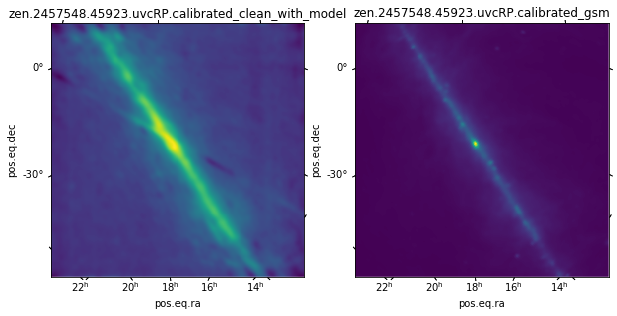

In [5]:
fig, axes = plt.subplots(nrows=1,ncols=2,subplot_kw={'projection': wcs},figsize=(10,10))
hdu = fits.open('zen.2457548.45923.uvcRP.calibrated_clean_with_model.image.fits')
header = hdu[0].header
wcs = WCS(header,naxis=2)
data = hdu[0].data
axes[0].imshow(data[0][0])
axes[0].set_title('zen.2457548.45923.uvcRP.calibrated_clean_with_model')
#plt.savefig('zen.2457548.45923.uvcRP.calibrated_clean_with_model.image.png')


hdu = fits.open('zen.2457548.45923.uvcRP.calibrated_gsm.fits')
header = hdu[0].header
wcs = WCS(header,naxis=2)
data = hdu[0].data
axes[1].imshow(data)
axes[1].set_title("zen.2457548.45923.uvcRP.calibrated_gsm")
#plt.savefig('zen.2457548.45923.uvcRP.calibrated_gsm.png')